In [1]:
# This library is used for structured data operations, like import CSV files, create data frames, and data preparation
import pandas as pd
#This is a mathematical library. Has a powerful N-dimensional array object, linear algebra, Fourier transform, etc.
import numpy as np
#This library is used for visualization of data.
import matplotlib.pyplot as plt
#The Simple Imputer class from sklearn.impute is a useful tool for handling missing values in datasets.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
#This library os used for statistical graphics. It builds on top of matplotlib and integrates closely with pandas DS
import seaborn as sns

#NLP Libraries
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category = DeprecationWarning)

In [2]:
file_path = '/kaggle/input/british-airways-reviews/british_airways_reviews.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

In [3]:

# Set the display options to show more rows and columns
pd.set_option('display.max_columns', None)  # No column limit
pd.set_option('display.max_rows', None)  # No row limit
pd.set_option('display.max_seq_item', None)  # No item truncation for sequences (like lists)


df= df.dropna(subset=['Route', 'Date Flown','Type of Traveller','Seat Type','Trip Status'])


# Define columns that need imputation for ratings
columns_to_impute = ['Seat Comfort Rating', 'Staff Service Rating', 'Food & Beverages Rating',
                     'Inflight Entertainment Rating', 'Ground Service Rating']

# Initialize SimpleImputer with the most frequent strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Group by 'type_of_traveller' and apply imputation to each group
for traveller_type in df['Type of Traveller'].unique():
    # Select rows for the current traveller type
    subset = df[df['Type of Traveller'] == traveller_type]

    # Apply the imputer only to this subset
    df.loc[df['Type of Traveller'] == traveller_type, columns_to_impute] = imputer.fit_transform(
        subset[columns_to_impute])


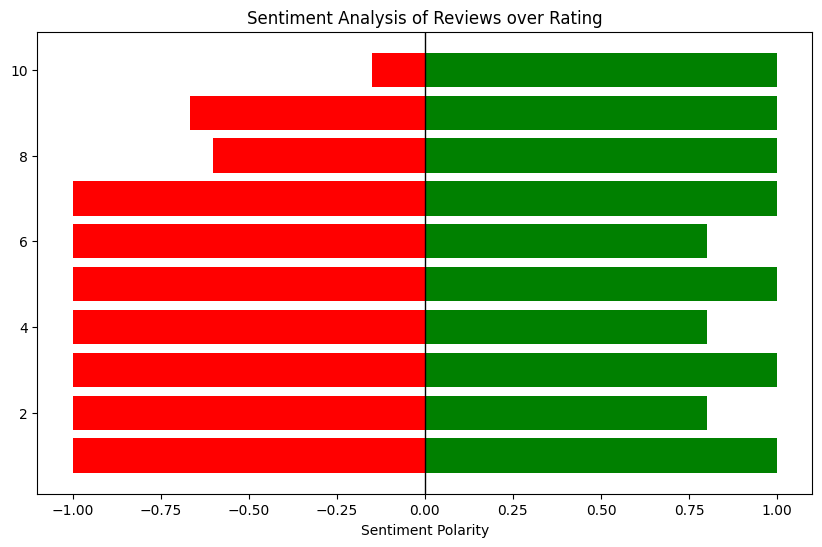

In [4]:
# Function to calculate sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis on the 'Review' column
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Classify sentiment as Positive, Negative, or Neutral based on polarity
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.barh(df['Overall Rating'], df['Sentiment'], color=['green' if x > 0 else 'red' for x in df['Sentiment']])
plt.xlabel('Rating')
plt.xlabel('Sentiment Polarity')
plt.title('Sentiment Analysis of Reviews over Rating')
plt.axvline(0, color='black', linewidth=1)  # Add a vertical line at 0 (neutral sentiment)
plt.show()

In [5]:


# Extract year from the "Date Flown" column
df['Year'] = pd.to_datetime(df['Date Flown'], format="%B %Y").dt.year

# Preprocess reviews to clean them (remove special characters, numbers, etc.)
def preprocess_review(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    text = text.lower()  # Convert text to lowercase
    return text

df['Cleaned_Review'] = df['Review'].apply(preprocess_review)

# Function for LDA topic modeling per year
def topic_modeling_per_year(year_data):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(year_data)
    
    lda = LatentDirichletAllocation(n_components=3, random_state=42)
    lda.fit(X)
    
    # Display the top words for each topic
    feature_names = vectorizer.get_feature_names_out()
    num_top_words = 10
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        topics.append(" ".join(top_words))
    return topics

# Group data by year and apply topic modeling
yearwise_topics = {}
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]['Cleaned_Review']
    yearwise_topics[year] = topic_modeling_per_year(year_data)

# Display topics for each year
print("Top topics for each year:")
for year, topics in yearwise_topics.items():
    print(f"\nYear {year}:")
    for i, topic in enumerate(topics):
        print(f"  Topic {i+1}: {topic}")



Top topics for each year:

Year 2025:
  Topic 1: elderly relatively comfortable plane sympathy staff empathy excellent seats awful
  Topic 2: really downhill food gone use british airways route enjoyable experience
  Topic 3: flight good delayed thoroughly enjoyed right managed awful crew seats

Year 2024:
  Topic 1: crew service experience cabin worst customer flight friendly business class
  Topic 2: ba service poor experience customer extremely terrible low recommend cost
  Topic 3: flight british food travel cancelled airways return uncomfortable seat using

Year 2023:
  Topic 1: service customer british airways good crew ba fly appalling cost
  Topic 2: flight class poor business delayed recommend crew luggage staff disappointing
  Topic 3: airline worst experience ba fly ive luggage better boarding really

Year 2022:
  Topic 1: experience staff seat friendly uncomfortable disappointing food like airline club
  Topic 2: ba use economy british airways worth complete positive premiu

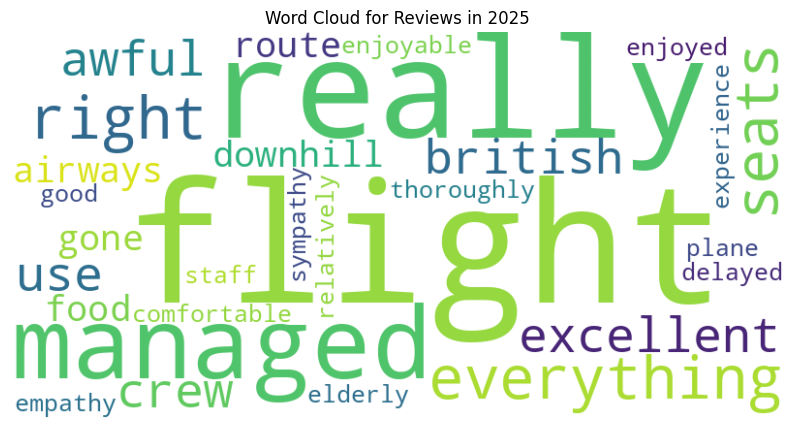

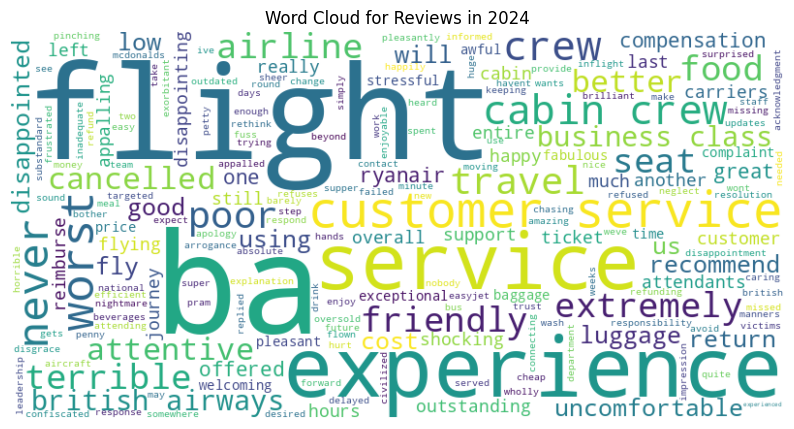

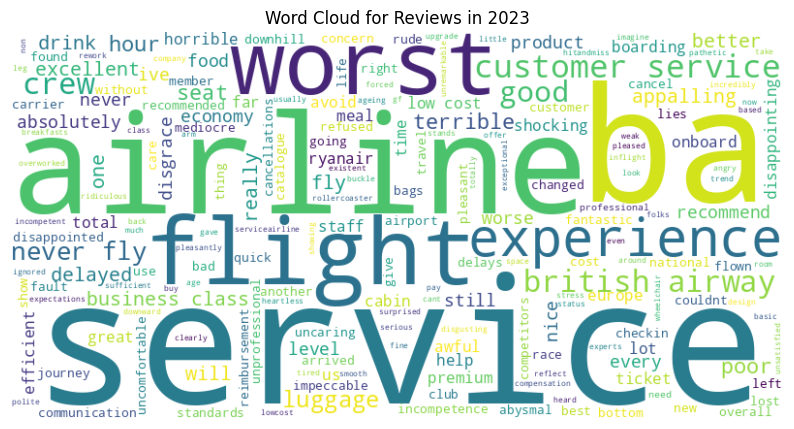

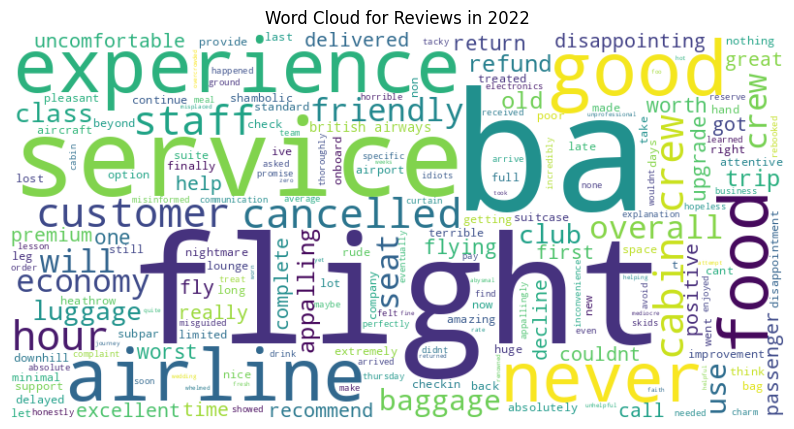

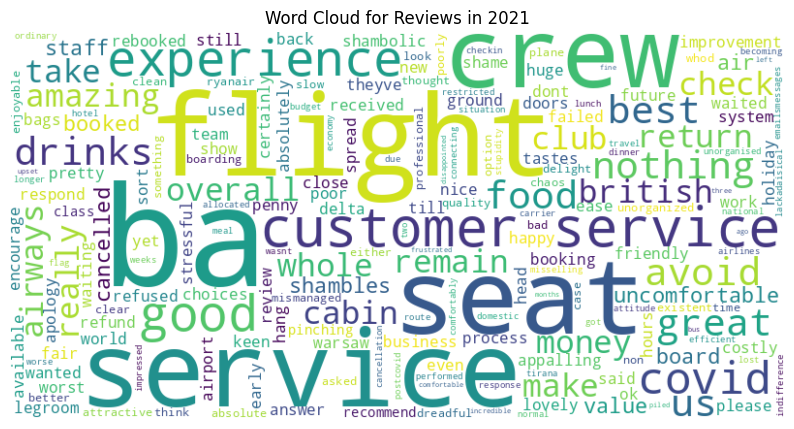

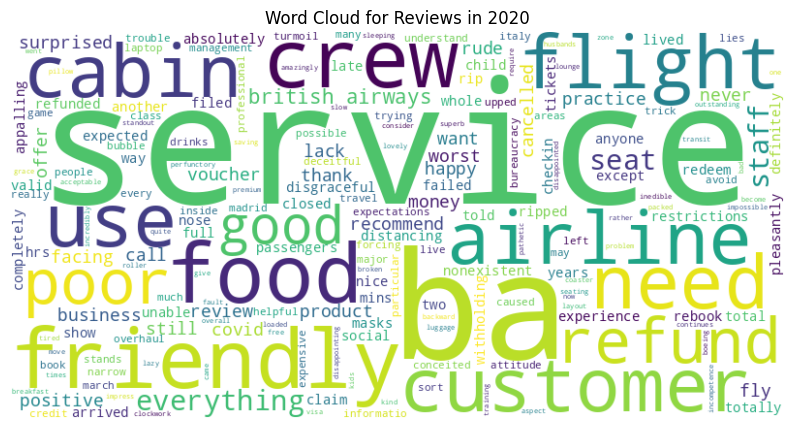

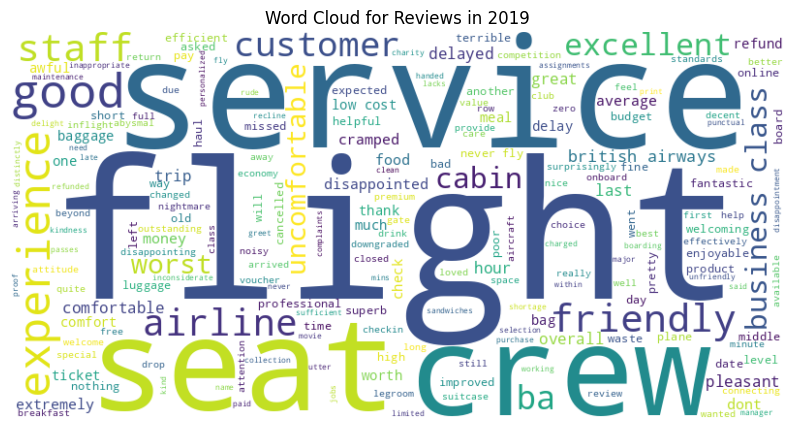

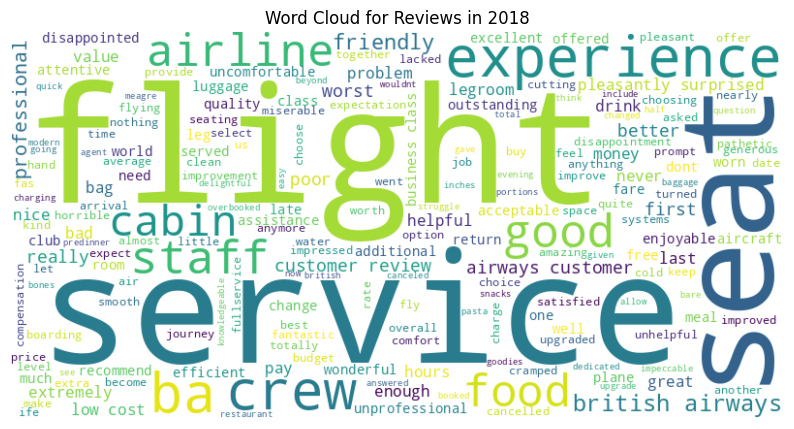

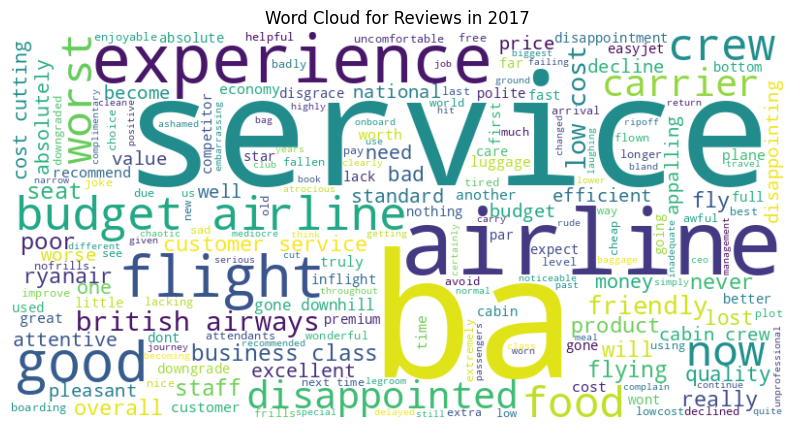

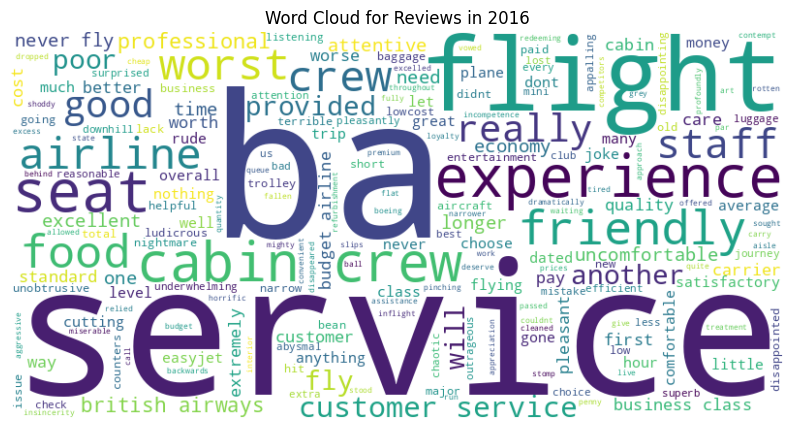

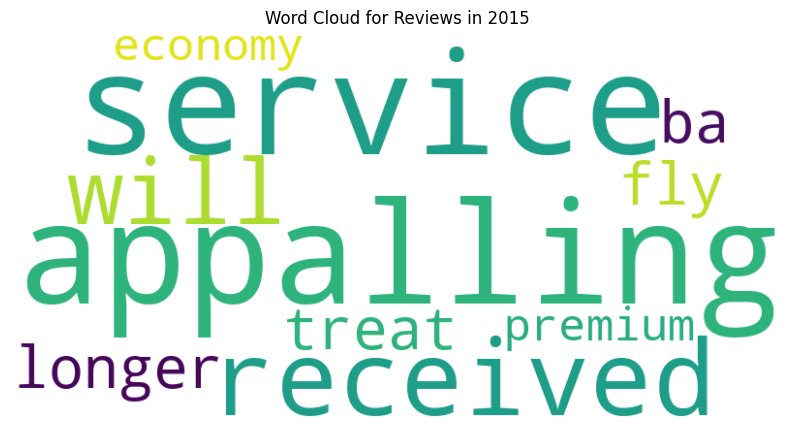

In [6]:
# Generate Word Cloud per Year
for year in df['Year'].unique():
    year_reviews = " ".join(df[df['Year'] == year]['Cleaned_Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(year_reviews)
    
    # Plot Word Cloud for each year
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Reviews in {year}")
    plt.show()

                               Seat Comfort Rating  Staff Service Rating  \
Seat Comfort Rating                       1.000000              0.543788   
Staff Service Rating                      0.543788              1.000000   
Food & Beverages Rating                   0.588005              0.606979   
Inflight Entertainment Rating             0.434068              0.302841   
Ground Service Rating                     0.562624              0.451193   
Value For Money Rating                    0.673899              0.580414   
Negative Sentiment                       -0.251540             -0.231068   

                               Food & Beverages Rating  \
Seat Comfort Rating                           0.588005   
Staff Service Rating                          0.606979   
Food & Beverages Rating                       1.000000   
Inflight Entertainment Rating                 0.506328   
Ground Service Rating                         0.526161   
Value For Money Rating                     

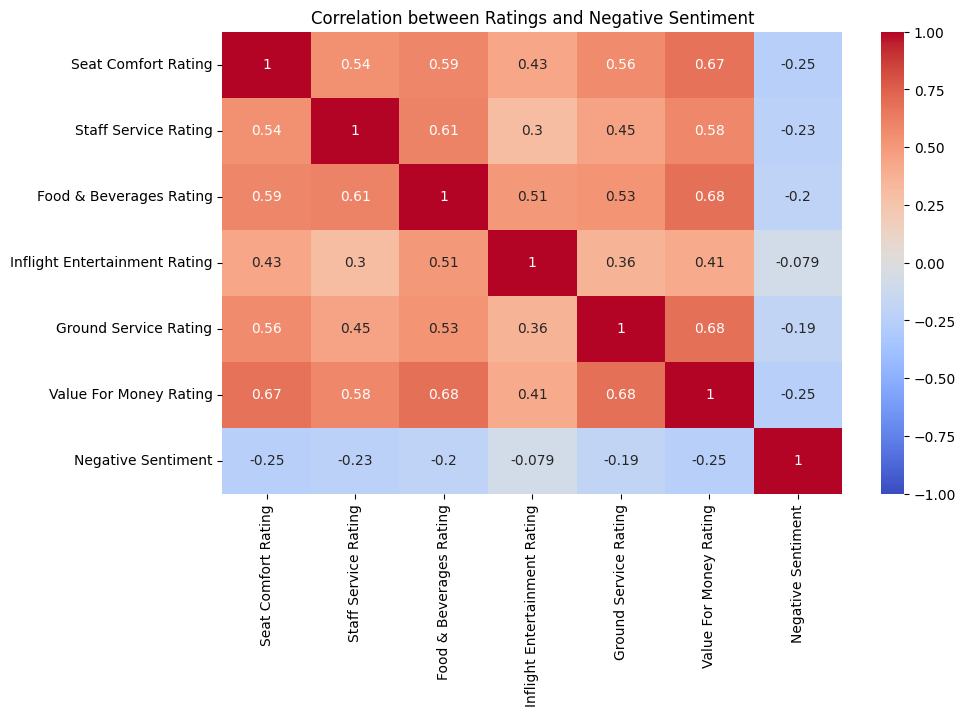

In [7]:

# Function to calculate sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis on the 'Review' column
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Classify sentiment as Negative (if polarity < 0)
df['Negative Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x < 0 else 0)

# Calculate Correlation between all ratings and 'Negative Sentiment'
correlation = df[['Seat Comfort Rating', 'Staff Service Rating', 'Food & Beverages Rating',
                  'Inflight Entertainment Rating', 'Ground Service Rating', 'Value For Money Rating', 'Negative Sentiment']].corr()

# Display the correlation matrix
print(correlation)

# Plot the correlation matrix for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Ratings and Negative Sentiment')
plt.show()

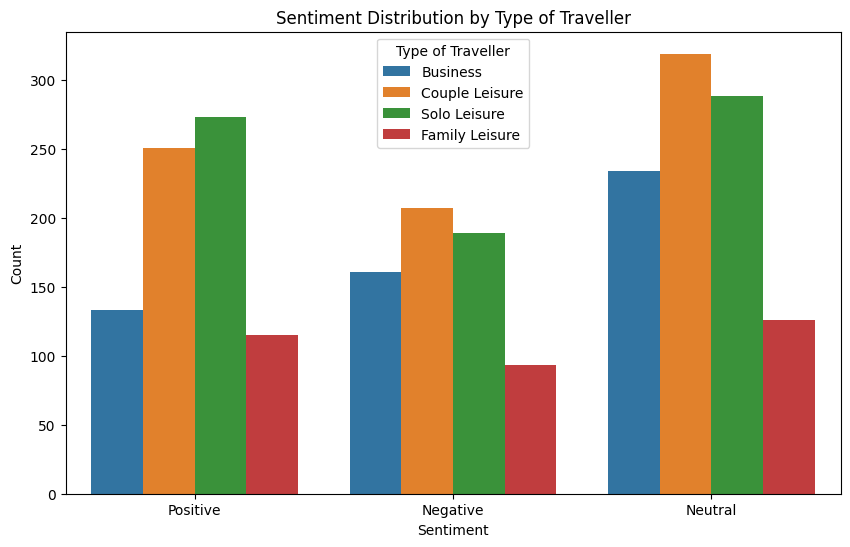

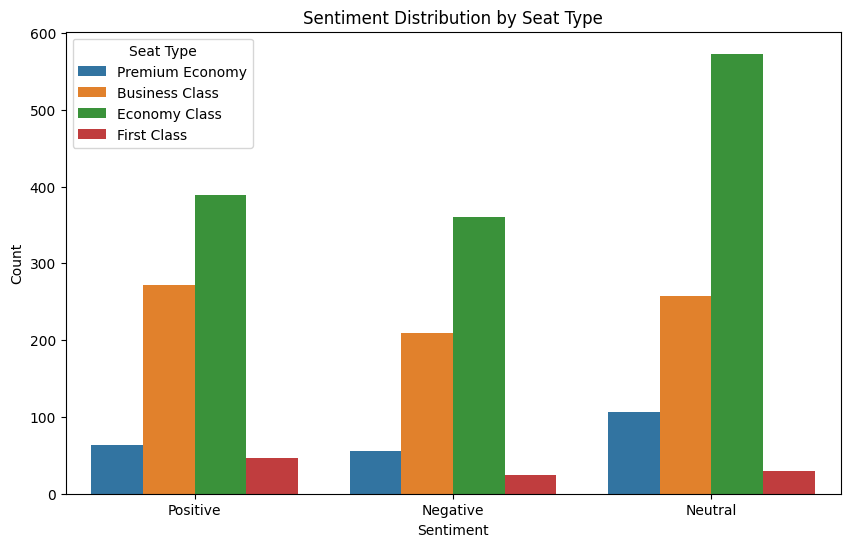

In [8]:

# Clean and preprocess the reviews (if needed)
def preprocess_review(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    text = text.lower()  # Convert text to lowercase
    return text

df['Cleaned_Review'] = df['Review'].apply(preprocess_review)

# Sentiment Analysis Function (Using TextBlob)
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)

# Classify Sentiment as Positive, Negative, or Neutral based on polarity
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Now, you can categorize reviews based on 'Type of Traveller' and 'Seat Type'
# Assuming columns: 'Type of Traveller', 'Seat Type', 'Sentiment_Label', 'Rating Columns' (like seat comfort, food, etc.)

# Visualize sentiment distribution by traveler type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment_Label', hue='Type of Traveller')
plt.title('Sentiment Distribution by Type of Traveller')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualize sentiment distribution by seat type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment_Label', hue='Seat Type')
plt.title('Sentiment Distribution by Seat Type')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

